<a href="https://colab.research.google.com/github/vassilyf/ml/blob/main/Lesson_5_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import files
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from matplotlib import pyplot as plt


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:

uploaded = files.upload()

Saving train.csv to train.csv


In [13]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df2 = df.drop(columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      714 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 22.3 KB


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df2.loc[:, ['Age', 'Fare']].values, df2['Survived'].values, test_size=0.2, random_state=42)

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probas = model.predict_proba(X_test)

print(accuracy_score(y_test, predictions))
predictions

0.6293706293706294


array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

Удаляем следующие признаки:
- PassengerId, уникальный для каждого пассажира, не подходит для обобщения
- Name, тоже уникальный для пассажира
- Ticket, номер билета, не совсем уникальный, 210 повторов, но навряд ли подходит для моделирования
- Cabin, слишком много пропусков


In [16]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
dup = df.duplicated(subset=['Ticket'])
print(f"Повторы в номере билета {dup.loc[lambda x: x].count()} \n\n")
df.info()


Повторы в номере билета 210 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df_clean = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df_clean = df_clean.dropna()
#df_clean.info()
print(f"Потеряно данных при удалении пропусков: {len(df_clean.index)/len(df.index)*100:.{1}f}%")

Потеряно данных при удалении пропусков: 79.9%


In [45]:
df_clean = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
# пропущенный возраст заполняем средним значением
df_clean['Age'].fillna((df_clean['Age'].mean()), inplace=True)
# по поводу Embarked. Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown
# 2 пропуска дополняем модой
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)
df_clean.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [46]:
df_enc = pd.get_dummies(df_clean.loc[:,:])
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


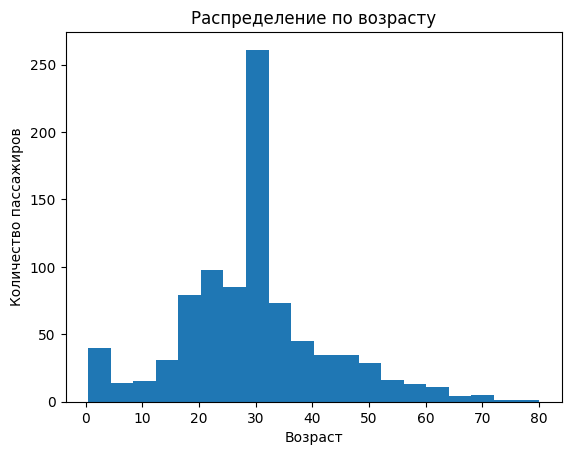

In [47]:
# смотрим насчет выбросов
# в возрасте выбросов не видно

n_bins = 20
plt.hist(df_enc['Age'], bins=n_bins)
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

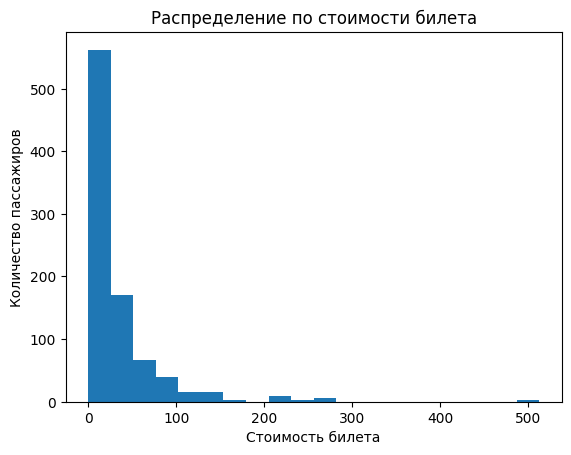

In [48]:
# в стоимости билетов, возможно, есть выбросы по самым дорогим билетам

n_bins = 20
plt.hist(df_enc['Fare'], bins=n_bins)
plt.title('Распределение по стоимости билета')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.show()

In [49]:
q25, q75 = np.percentile(df_enc['Fare'], 25), np.percentile(df_enc['Fare'], 75)
cut_off = (q75-q25) * 1.5
upper = q75 + cut_off
print(f"По границе 1.5 * IRQ, q25={q25}, q75={q75}, upper={upper}")


По границе 1.5 * IRQ, q25=7.9104, q75=31.0, upper=65.6344


Отбросить билеты с ценой больше 66 мне кажется не правильным, так как отсекается много дорогих билетов, а их наличие у пассажира может оказаться важным для модели. Поэтому оставляем все как есть. (Было бы интересно узнать, каким методом тут можно воспользоваться)

In [50]:
# математически преобразуем признак Age
# предлагается взять логарифм, чтобы повысить разницу между детьми и взрослыми и уменьшить разницу между пожилыми и очень пожилыми

df_enc['Age'] = df_enc['Age'].transform(np.log)


In [51]:
X = df_enc.copy().drop(columns=['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X.values, df_enc['Survived'].values, test_size=0.2, random_state=42)

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probas = model.predict_proba(X_test)

print(accuracy_score(y_test, predictions))


0.8044692737430168


Выводы:
1. были исключены незначимые для построения модели индексные признаки, а также признак Cabin, для которого было очень много пропусков. После этого были удалены строки с пропущенными значениями. Категориальные значения преобразованы в наборы числовых признаков методом one-hot. К возрасту применено логарифмическое преобразование.
2. точность второй модели выше чем первой, построенной на меньшем количестве признаков, так как учитываются дополнительные значимые признаки
3. Предварительная подготовка данных перед обучением модели имеет очень большое значение на качество полученной модели. Причем характер подготовки во многом зависит от типа используемой модели.
